In [1]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for regression 
import statsmodels.api as sm

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('C:\\Users\\alexr\\Documents\\GitHub\\Projects\\Data Developer Salary\\Dataset salary 2024.csv')

In [3]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [4]:
# Displaying the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df = df.drop('salary', axis=1)

In [7]:
#check for categorical collumn have appropriate levels
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [8]:
#check categorical value
for i in df.columns:
    print(i.upper(),":",df[i].unique())

WORK_YEAR : [2024 2022 2023 2020 2021]
EXPERIENCE_LEVEL : ['SE' 'MI' 'EN' 'EX']
EMPLOYMENT_TYPE : ['FT' 'CT' 'PT' 'FL']
JOB_TITLE : ['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Mach

In [9]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
work_year,16534.000000,2023.226866,0.713558,2020.000000,2023.000000,2023.000000,2024.000000,2024.000000
salary_in_usd,16534.000000,149686.777973,68505.293156,15000.000000,101125.000000,141300.000000,185900.000000,800000.000000
remote_ratio,16534.000000,32.003750,46.245158,0.000000,0.000000,0.000000,100.000000,100.000000


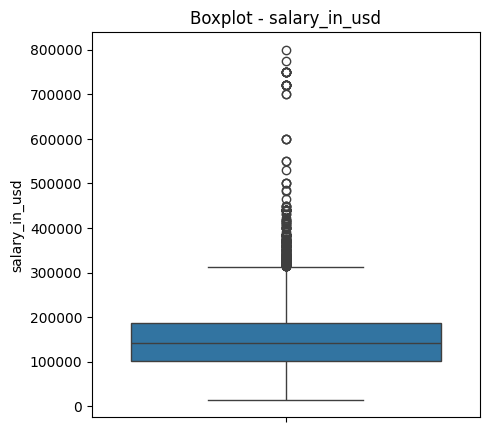

In [10]:
n1 = 'salary_in_usd'
n2 = 'reading_score'
n3 = 'writing_score'

#fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (5,5))

#Box plot
sns.boxplot(y = n1, data=df)
plt.title(f'Boxplot - {n1}')


#adjust layout
#plt.tight_layout()

#Show the plots
plt.show()

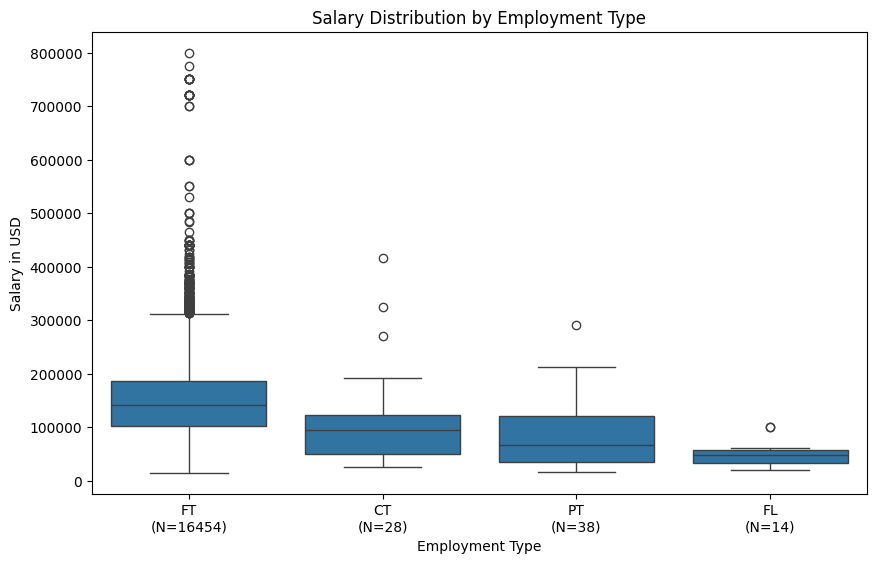

In [11]:
employment_counts = df['employment_type'].value_counts().sort_index()
df['employment_type_with_count'] = df['employment_type'].map(lambda x: f"{x}\n(N={employment_counts[x]})")

plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type_with_count', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_20908\4268164897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='company_location', data=top_10_countries, palette='viridis')


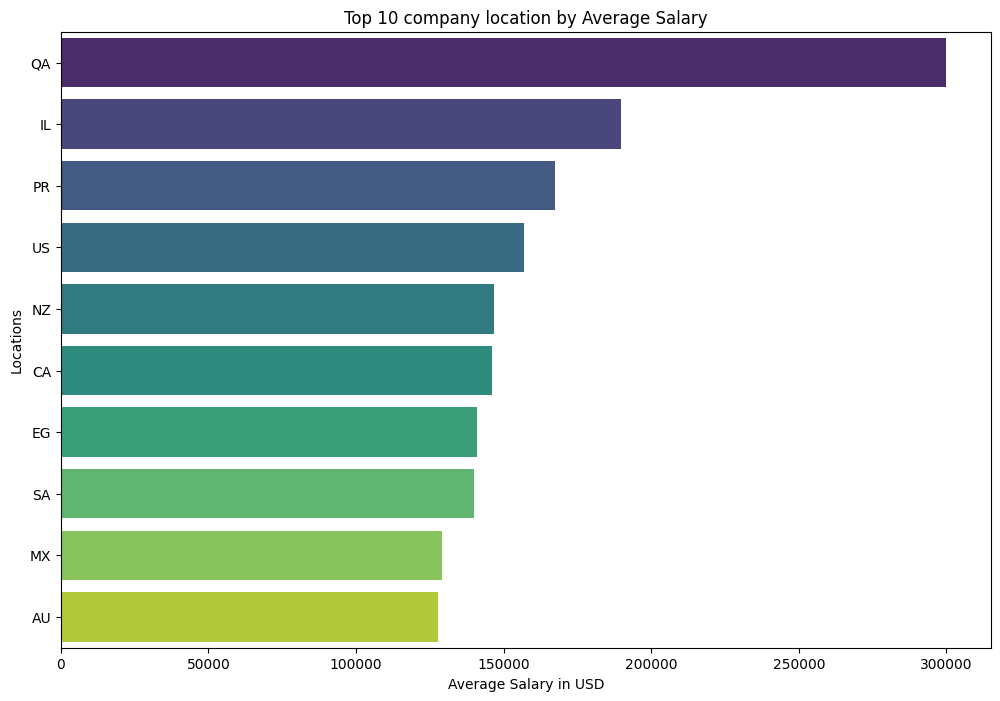

In [12]:
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_countries = average_salary_by_country.head(10)
top_10_countries = top_10_countries.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='company_location', data=top_10_countries, palette='viridis')
plt.title('Top 10 company location by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Locations')
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_20908\697078322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='job_title', data=top_10_job_title, palette='viridis')


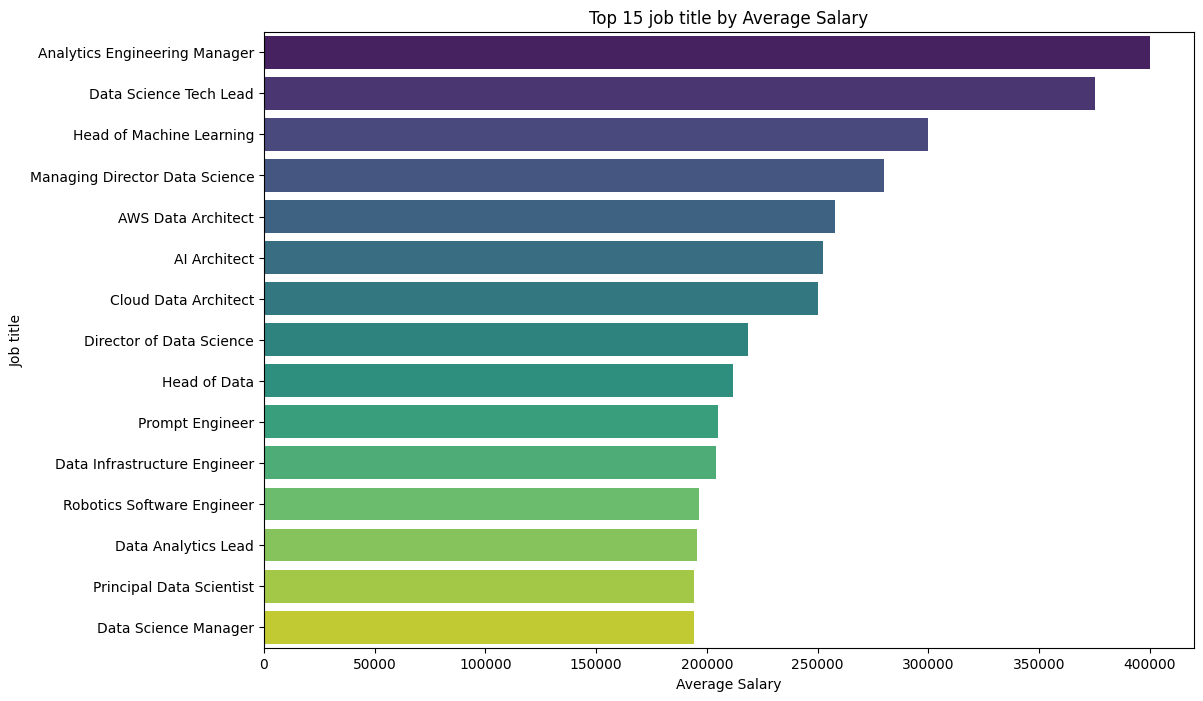

In [13]:
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_job_title = average_salary_by_job_title.head(15)
top_10_job_title = top_10_job_title.reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=top_10_job_title, palette='viridis')
plt.title('Top 15 job title by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job title')
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_20908\850867263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='experience_level', data=experience_level, palette='viridis')


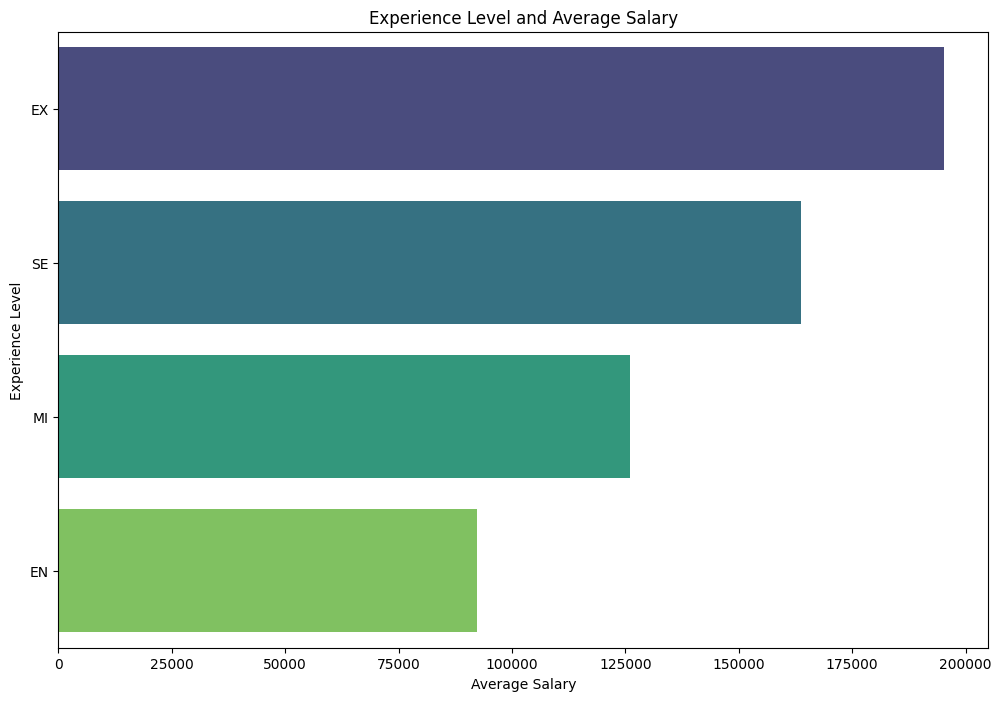

In [14]:
average_salary_by_experience_level = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
experience_level = average_salary_by_experience_level.head()
experience_level = experience_level.reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='experience_level', data=experience_level, palette='viridis')
plt.title('Experience Level and Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Experience Level')
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_20908\640768452.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='company_size', data=company_size, palette='viridis')


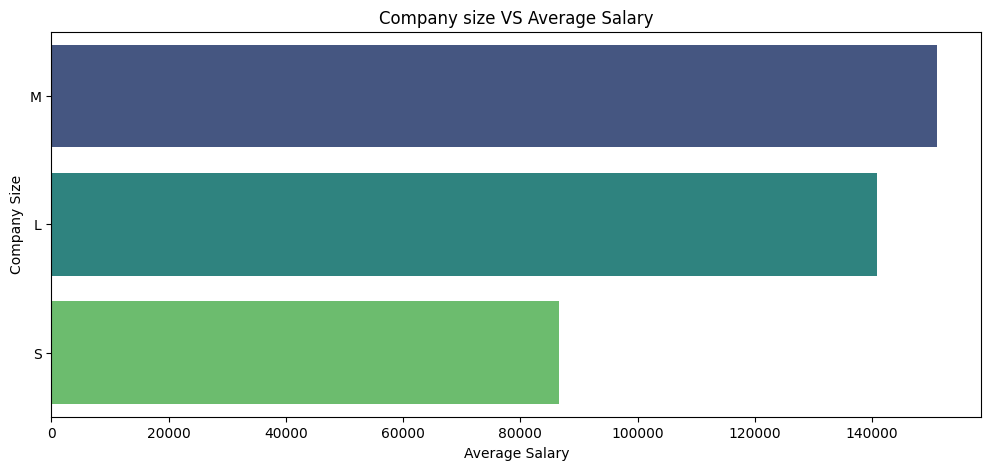

In [15]:
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
company_size = average_salary_by_company_size.head()
company_size = company_size.reset_index()


plt.figure(figsize=(12, 5))
sns.barplot(x='salary_in_usd', y='company_size', data=company_size, palette='viridis')
plt.title('Company size VS Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Company Size')
plt.show()

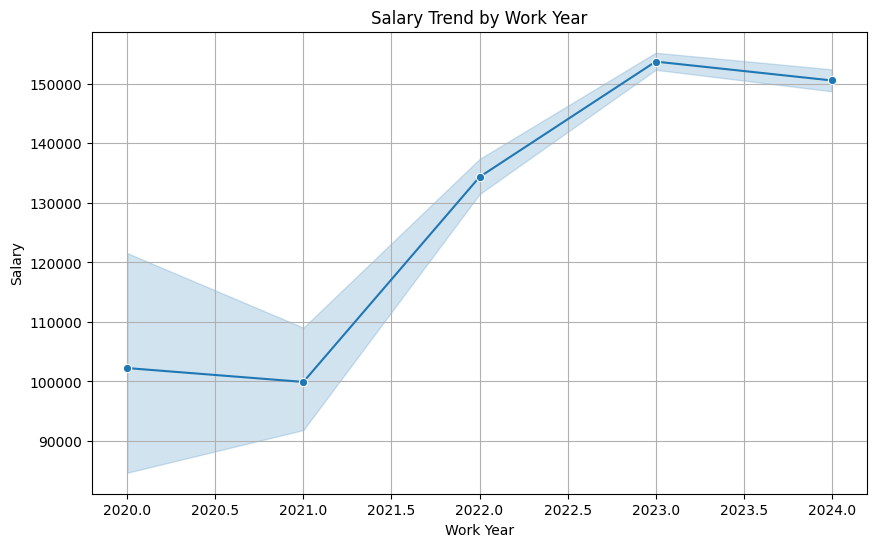

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, marker='o')
plt.title('Salary Trend by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

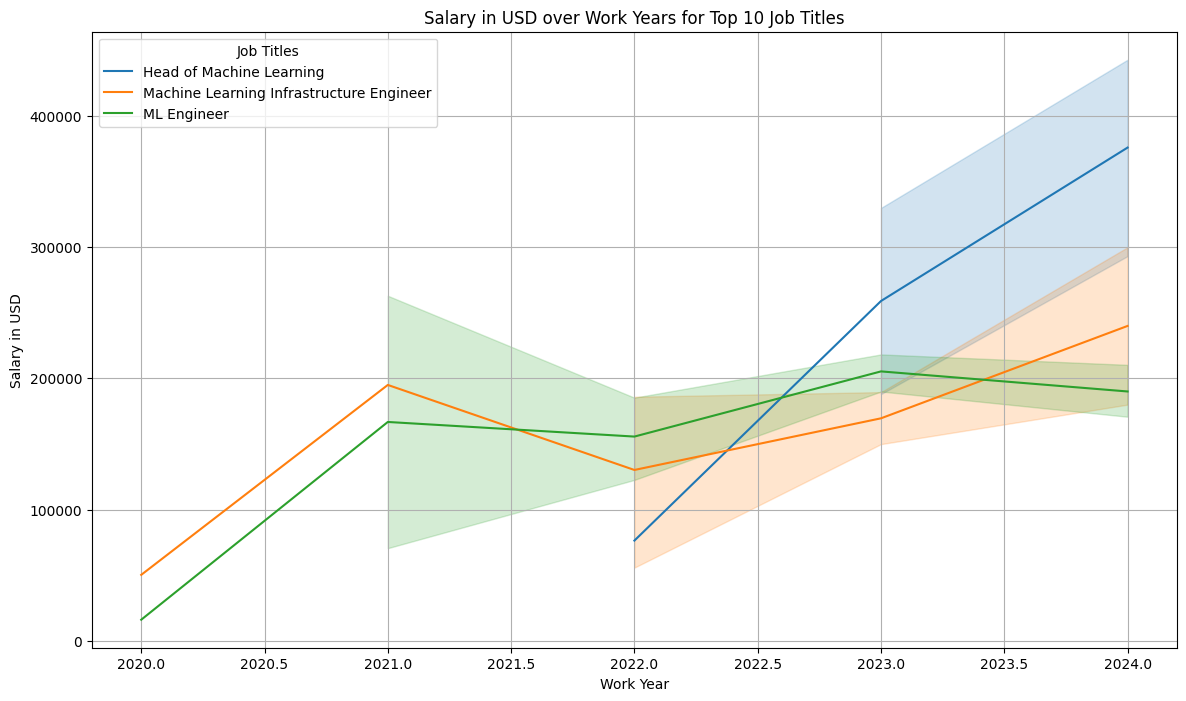

In [17]:
average_salary_by_job_year = df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().unstack()
average_salary_by_job_year['growth'] = average_salary_by_job_year.diff(axis=1).sum(axis=1)
top_10_job_titles = average_salary_by_job_year['growth'].sort_values(ascending=False).head(3).index

plt.figure(figsize=(14, 8))
plt.figure(figsize=(14, 8))
for job in top_10_job_titles:
    job_data = df[df['job_title'] == job]
    sns.lineplot(x='work_year', y='salary_in_usd', data=job_data, label=job)

plt.title('Salary in USD over Work Years for Top 10 Job Titles')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()

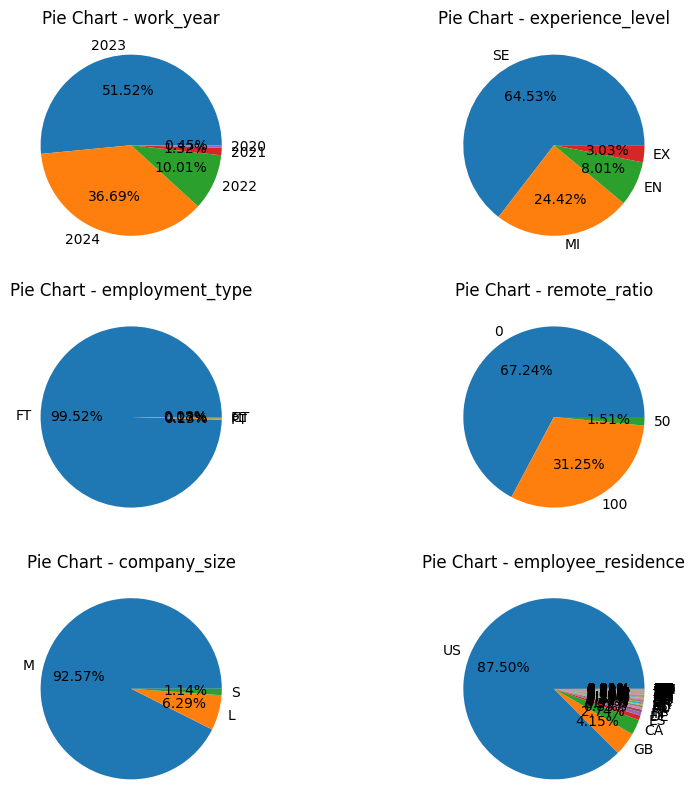

In [18]:
v1 = 'work_year'
v2 = 'experience_level'
v3 = 'employment_type'
v4 = 'remote_ratio'
v5 = 'company_size'
v6 = 'employee_residence'


#fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (10,10))

#Box plot
plt.subplot(3, 2, 1)
counts = df[v1].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v1}')

plt.subplot(3, 2, 2)
counts = df[v2].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v2}')

plt.subplot(3, 2, 3)
counts = df[v3].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v3}')

plt.subplot(3,2,4)
counts = df[v4].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v4}')

plt.subplot(3,2,5)
counts = df[v5].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v5}')

plt.subplot(3,2,6)
counts = df[v6].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v6}')

#adjust layout
#plt.tight_layout()

#Show the plots
plt.show()

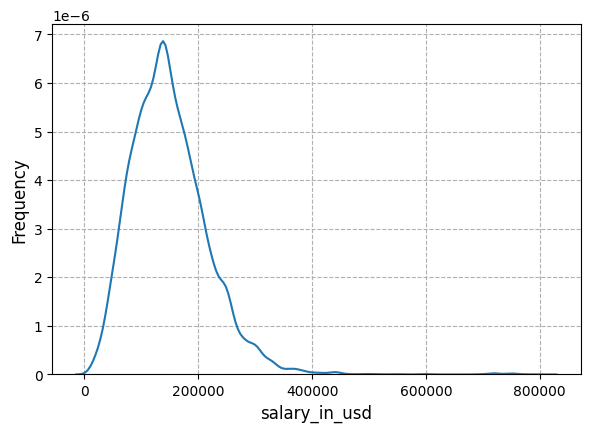

In [19]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.kdeplot(data = df['salary_in_usd'])
#plt.xlim([0,100])  
plt.xlabel("salary_in_usd", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     

plt.show()

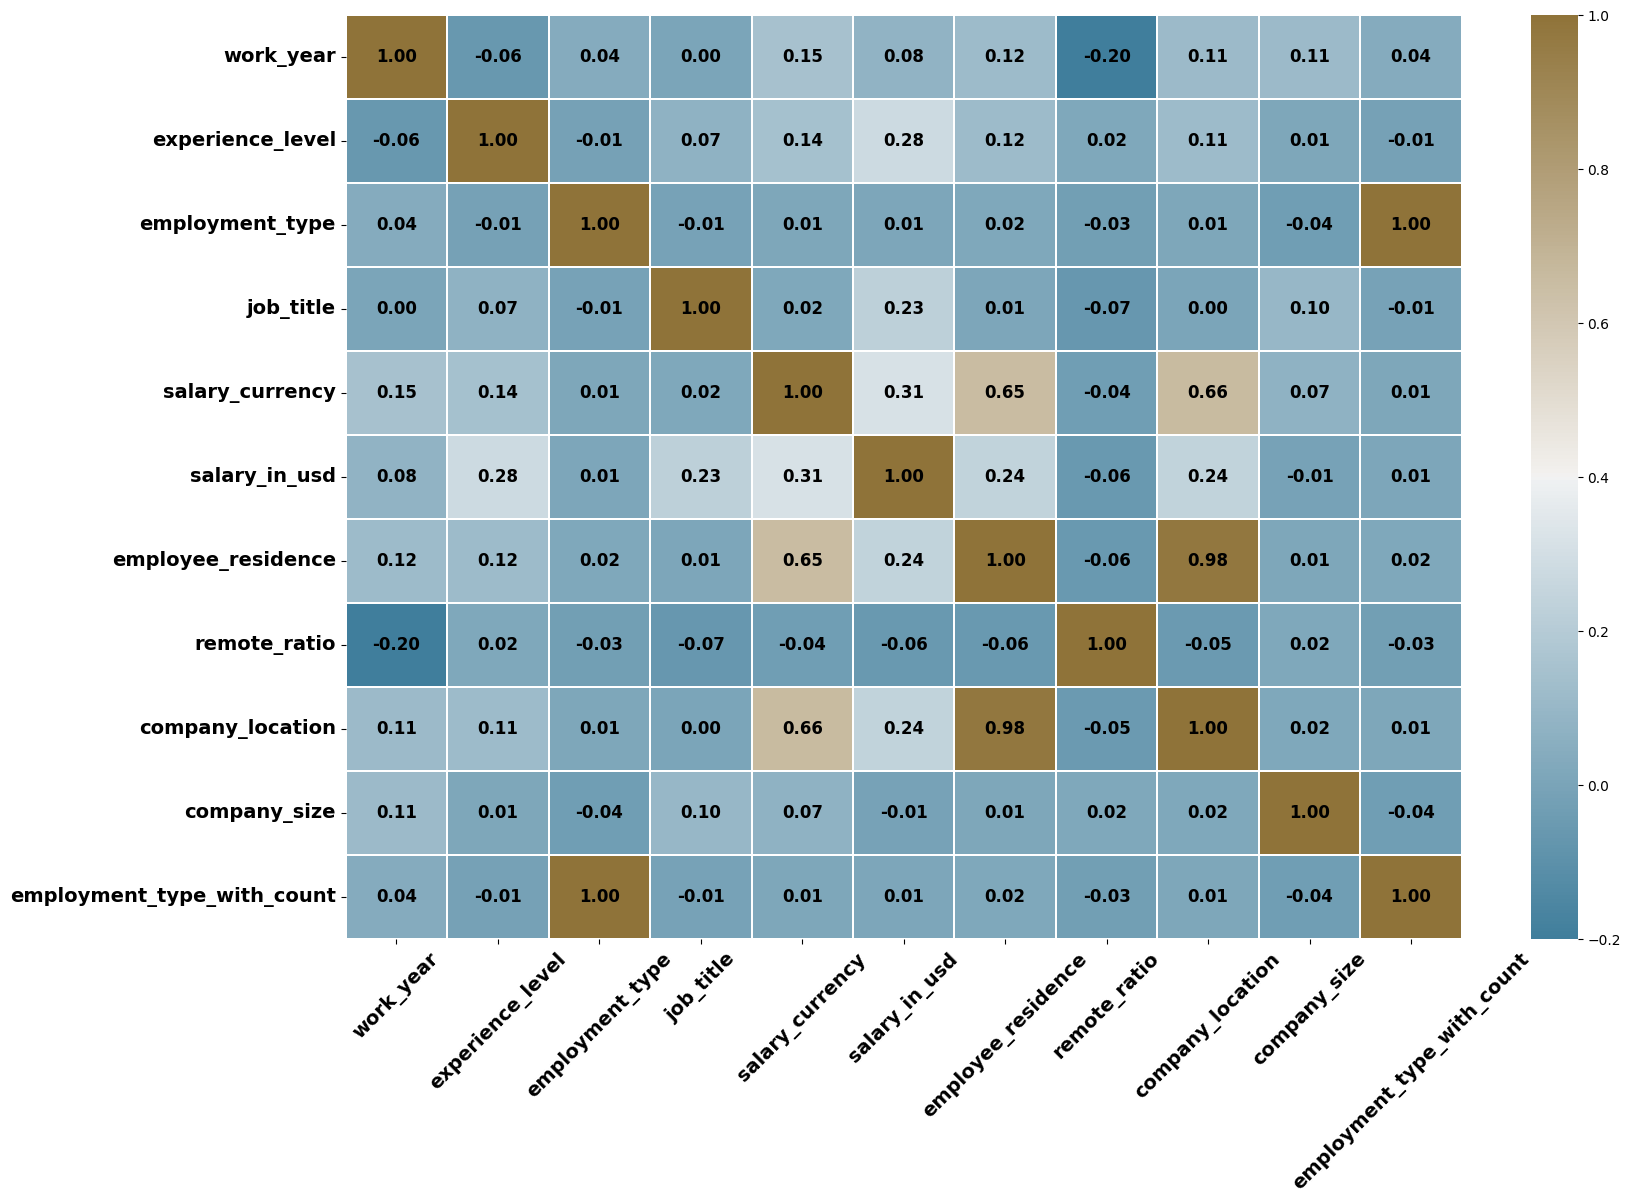

In [20]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()

In [43]:
#ohe = OneHotEncoder()
#ohe = OneHotEncoder().set_output(transform='pandas')
#ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')

In [61]:
ohetr = ohe.fit_transform(df[['employee_residence']])

In [62]:
ohetr

,employee_residence_AD,employee_residence_AE,employee_residence_AM,employee_residence_AR,employee_residence_AS,employee_residence_AT,employee_residence_AU,employee_residence_BA,employee_residence_BE,employee_residence_BG,...,employee_residence_SI,employee_residence_TH,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_UG,employee_residence_US,employee_residence_UZ,employee_residence_VN,employee_residence_ZA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
df3 = pd.concat([df,ohetr], axis = 1).drop(columns = ['experience_level'])

In [47]:
df3.head()

,work_year,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_with_count,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2024,FT,AI Engineer,USD,202730,US,0,US,M,FT\n(N=16454),0.0,0.0,0.0,1.0
1,2024,FT,AI Engineer,USD,92118,US,0,US,M,FT\n(N=16454),0.0,0.0,0.0,1.0
2,2024,FT,Data Engineer,USD,130500,US,0,US,M,FT\n(N=16454),0.0,0.0,0.0,1.0
3,2024,FT,Data Engineer,USD,96000,US,0,US,M,FT\n(N=16454),0.0,0.0,0.0,1.0
4,2024,FT,Machine Learning Engineer,USD,190000,US,0,US,M,FT\n(N=16454),0.0,0.0,0.0,1.0


In [53]:
model = LinearRegression()

In [51]:
#df3 = pd.concat([df,ohetr], axis = 1).drop(columns = ['experience_level'])
df3 = df['salary_in_usd']

In [52]:
df3

0        202730
1         92118
2        130500
3         96000
4        190000
          ...  
16529    412000
16530    151000
16531    105000
16532    100000
16533     94665
Name: salary_in_usd, Length: 16534, dtype: int64

In [63]:
model.fit(ohetr,df3)

LinearRegression()

In [64]:
model.score(ohetr,df3)

0.11443823568748568